# Importing the Required Libraries

In [1]:
import pandas as pd #For Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("NSE-TATAGLOBAL.csv") #load the file and see it's loaded successfully or not.
df=df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df2=df["Close"] #we will take closure price for a stock

In [4]:
df.max() #see the maximum value for each columns

Date                    2018-09-28
Open                         327.7
High                        328.75
Low                         321.65
Last                        325.95
Close                       325.75
Total Trade Quantity      29191015
Turnover (Lacs)           55755.08
dtype: object

In [5]:
df.min() #see the minimum for each column from the stock dataset.

Date                    2010-07-21
Open                          81.1
High                          82.8
Low                           80.0
Last                          81.0
Close                        80.95
Total Trade Quantity         39610
Turnover (Lacs)              37.04
dtype: object

In [6]:
df2 #it contains the closure price of each day.

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

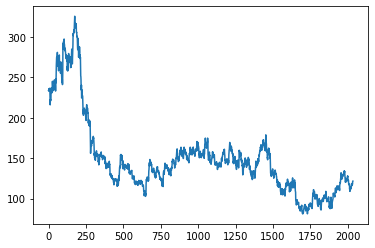

In [7]:
plt.plot(df2) #visualize the closing price with each days from the day it opens.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [9]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [10]:
training_size,test_size #see the dimensions of training and test size

(1322, 713)

In [11]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1221, 100)
(1221,)
(612, 100)
(612,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\nanug\.conda\envs\tf-gpu\lib\site-packages\requests\__init__.py:78: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({0}) or chardet ({1}) doesn't match a supported "


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 24s 283ms/step - loss: 0.0251 - val_loss: 0.0070
Epoch 2/100
20/20 [==============================] - 1s 59ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 3/100
20/20 [==============================] - 1s 47ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 1s 52ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 1s 51ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 1s 54ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 1s 55ms/step - loss: 0.0014 - val_loss: 9.4643e-04
Epoch 8/100
20/20 [==============================] - 1s 48ms/step - loss: 0.0013 - val_loss: 9.3150e-04
Epoch 9/100
20/20 [==============================] - 1s 47ms/step - loss: 0.0012 - val_loss: 9.0654e-04
Epoch 10/100
20/20 [==============================] - 1s 45ms/step - loss: 0.0013 - va

20/20 [==============================] - 1s 47ms/step - loss: 2.4195e-04 - val_loss: 2.9966e-04
Epoch 78/100
20/20 [==============================] - 2s 87ms/step - loss: 2.7509e-04 - val_loss: 3.1383e-04
Epoch 79/100
20/20 [==============================] - 1s 46ms/step - loss: 2.4335e-04 - val_loss: 2.0707e-04
Epoch 80/100
20/20 [==============================] - 1s 71ms/step - loss: 2.6317e-04 - val_loss: 2.5771e-04
Epoch 81/100
20/20 [==============================] - 1s 51ms/step - loss: 2.3496e-04 - val_loss: 2.1108e-04
Epoch 82/100
20/20 [==============================] - 1s 52ms/step - loss: 2.6084e-04 - val_loss: 2.1649e-04
Epoch 83/100
20/20 [==============================] - 1s 49ms/step - loss: 2.6544e-04 - val_loss: 2.1064e-04
Epoch 84/100
20/20 [==============================] - 1s 51ms/step - loss: 2.9421e-04 - val_loss: 2.0488e-04
Epoch 85/100
20/20 [==============================] - 1s 48ms/step - loss: 3.5517e-04 - val_loss: 2.7836e-04
Epoch 86/100
20/20 [============

In [19]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.64047742748394

In [22]:
math.sqrt(mean_squared_error(ytest,test_predict))

114.94426595858761

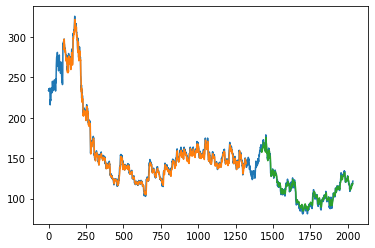

In [23]:
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data), X_test.shape

(713, (612, 100, 1))

In [25]:

x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [27]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16227405]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8 day output [[0.15371695]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.

16 day output [[0.1463424]]
17 day input [0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16227405
 0.16280921 0.1619380

24 day output [[0.14251421]]
25 day input [0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16227405 0.16280921 0.16193806
 0.16060595 0.15915091 0.15769234 0.15628494 0.15495653 0.15371695
 0.15256426 0.1514905

In [28]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [29]:
df3 = df2.tolist()
df3.extend(lst_output)

In [30]:
len(day_new)

100

In [31]:
len(df2)

2035

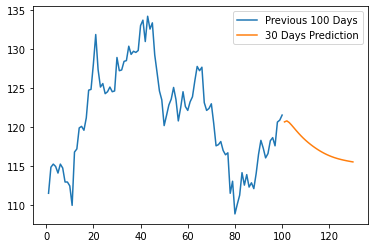

In [32]:
plt.plot(day_new, scaler.inverse_transform(df2[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.legend(['Previous 100 Days','30 Days Prediction'])